In [3]:
from init import *
from src.process_data import read_initial_data
data_prefix = "C:\\Users\\kathl\Desktop\\Github\\ceds-cigar\\pycigar\\utils\\data_generation\\load\\data"
data = [data_prefix + '\\7_MWp_P.csv', data_prefix + '\\10_MWp_P.csv', data_prefix + '\\12_MWp_P.csv', data_prefix + '\\19_MWp_P.csv']
new_file = [data_prefix + '\\LS\\Tran_bp_701_77073_5022.csv', data_prefix + '\\LS\\Tran_bp_701_77073_5025.csv', data_prefix + '\\LS\\Tran_bp_701_77073_5034.csv', data_prefix + '\\LS\\Tran_bp_701_77073_5035.csv']
# dss_kw = [0.14, 0.16, 0.18, 0.07, 0.09] #assumes input in kw
dss_kw = []
load_gen = LoadGenerator(new_file, dss_kw) 

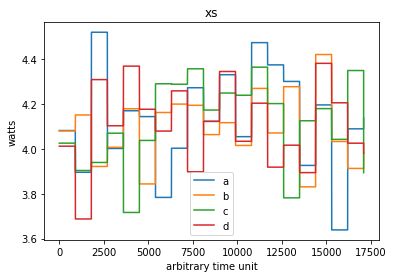

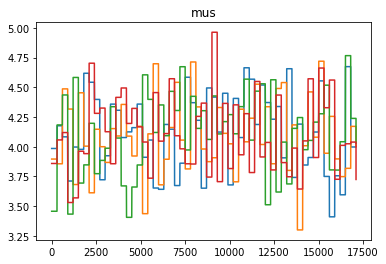

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
for a in load_gen.em_mu:
  
    plt.plot(a)
plt.legend(['a', 'b', 'c', 'd'])
plt.ylabel('watts')
plt.xlabel('arbitrary time unit')
plt.title('xs')
fig = plt.figure()
for b in load_gen.em_x:
    plt.plot(b)
plt.title('mus')
order = [4.67, 4.71, 4.76, 4.96]


4


Text(0, 0.5, 'watts (?)')

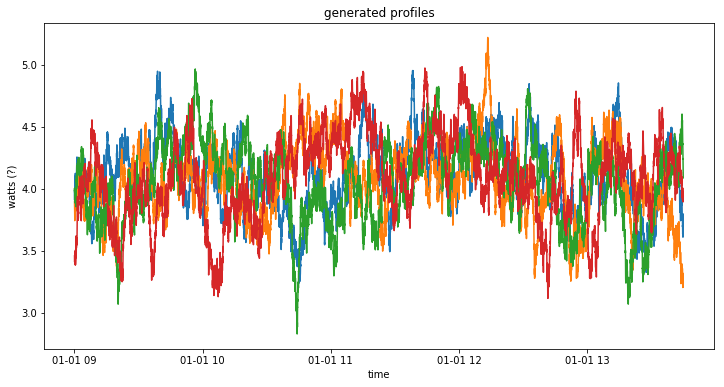

In [13]:
hi = load_gen.generate_load(order)

fig = plt.figure(figsize=(12,6))
for h in hi:
    plt.plot(h)
plt.title('generated profiles')
plt.xlabel('time')
plt.ylabel('watts (?)')

In [ ]:
# import pandas as pd
# import numpy as np
# import scipy.stats as st
# import matplotlib.pyplot as plt
# from scipy.interpolate import splev, splrep
# from pycigar.utils.data_generation.load.src.cdf import make_cdf


# def make_pdf(dist, params, size=10000):
#     """Generate distributions's Probability Distribution Function """
#     # Separate parts of parameters
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]

#     # Get same start and end points of distribution
#     start = dist.ppf(0.01, *arg, loc=loc,
#                      scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
#     end = dist.ppf(0.99, *arg, loc=loc,
#                    scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

#     # Build PDF and turn into pandas Series
#     x = np.linspace(start, end, size)
#     y = dist.pdf(x, loc=loc, scale=scale, *arg)
#     pdf = pd.Series(y, x)

#     return pdf


# def normalize_data(time_series, order):
#     pdfs = []
#     pdf_std = []

#     for file in time_series:
#         # Make PDF with best params
#         params = st.norm.fit(file)
      
#         pdf = make_pdf(st.norm, params)  # mean and standard deviation
#         pdf_std.append(params[1])
#         pdfs.append(pdf)
        
#     return pdfs, pdf_std


# def generate_polynomial(pdfs, order, std_of_nonnormal_pdfs):
#     """
#     Fits a curve to standard deviation of the load profiles
#     Saves this curve to a pickle file
#     Plots curve
#     """
#     # must be ordered on x-coordinates to use splrep 
#     zipped_lists = zip(order, std_of_nonnormal_pdfs)
#     sorted_pairs = sorted(zipped_lists)
#     tuples = zip(*sorted_pairs)
#     list1, list2 = [ list(tuple) for tuple in  tuples]
   
#     spl = splrep(list1, list2)
#     return spl

In [ ]:

# def read_initial_data(input_file, output_time):
#     # Called by user
#     """ 
#     Returns contents of input CSV files as different output time sequences

#     Args: 
#     input_file (list of strings) - CSV file names 
#         ex. ['7_MWp_P.csv', '10_MWp_P.csv', '12_MWp_P.csv', '19_MWp_P.csv']
#     input_time (string) - Input time sequence 
#         ex. '1S'
#     output_time (list of strings)- Output time sequences 
#         ex. ['1S', '10S', '30S']
#     order (list of integers) -  MWp for each file 
#         ex. [7, 10, 12, 19]

#     """
#     ff = []
#     fdd = []
#     tss = []
#     for n in range(len(output_time)):
#         f, ts = read_files(input_file, output_time[n])
#         ff.append(f)
       
#         tss.append(ts)
#     return ff[0],tss[0]


# def read_files(input_file, output_time):
#     # User does not call

#     """ 
#     Reads the input CSV files and resamples/diffs
#     Returns data in different forms

#     Args: 
#     input_file (list of strings) - CSV file names 
#         ex. ['7_MWp_P.csv', '10_MWp_P.csv', '12_MWp_P.csv', '19_MWp_P.csv']
#     output_time (list of strings)- Output time sequences 
#         ex. ['1S', '10S', '30S']

#     """
#     file = [] # series from csv file
#     file_diff = [] # resampled data
#     time_series = [] # resampled data as a series

#     for n in range(len(input_file)):
#         file.append(pd.read_csv(input_file[n], index_col = 0, header = None,names=['P'], parse_dates=True ,infer_datetime_format=True))
# #         print(file[n].resample(output_time).pad())
# #         print(file[n].resample(output_time).mean().pad().diff(1))
#         file_diff.append(file[n].resample(output_time).mean().pad().diff(1).dropna())
        
#         time_series.append(file_diff[n].iloc[:,0])

#     return file, time_series




# def generate_mean_reversion_rate(files, output_time, input_time, order, spl):
#     """
#     Finds the mean reversion rate

#     Args: 
#     files (list of DataFrames)
#     input_time (string) - represents in the input time series, ex. '1S'
#     output_time (string) - represents the output time series, ex. '1S'
#     order (list) - loading levels
#     """

#     # x(t) profile
#     mrr = []
#     em_mu = []
#     em_x = []
#     em_Y = []
#     index_vals = []
#     meaned_data = []
#     orig_data = []

#     for k in range(len(files)):
#         #print(files[k].iloc[:10, :])
#         xs = files[k].resample(output_time).mean().pad()
#         meaned_data.append(xs)
#         orig_data.append(files[k])
       

#     for n in range(len(meaned_data)):
      
#         mu = orig_data[n].resample(input_time, label='right').mean().resample(output_time).pad()
#       #  print(len(mu), len(xs))
#         em_mu.append(mu)

#         # x profile
#         offset = len(xs) - len(mu)
#         x = meaned_data[n].pad().iloc[:len(meaned_data[n])-offset, :]
   
#         index_vals.append(x.index.array)
#         em_x.append(x)

#         # Forming the Y's (contingent on std_dev)
#         Y = np.array([])
#         np_x = x.to_numpy()
#         np_mu_10 = mu.to_numpy()

#         std_dev = splev(order[n], spl)
      

#         for i in range(len(x)):
#             Y = np.append(Y, (np_mu_10[i][0] - np_x[i][0]) / (std_dev**2))

#         em_Y.append(Y)
     
#         # Mean reversion rate
#         num = 0
#         denom = 0
#         for j in range(len(x)-1):
#             num += Y[j] * (np_x[j+1][0] - np_mu_10[j+1][0])
#             denom += Y[j] * (np_x[j][0] - np_mu_10[j][0])
#         mean_rev_rate = -np.log(num/denom)
#         mrr.append(mean_rev_rate)

#     for i in range(len(em_mu)):
#         em_mu[i] = em_mu[i].to_numpy()
#         em_x[i] = em_x[i].to_numpy()

#     return mrr, em_mu, em_x, index_vals, meaned_data



In [ ]:
# ff,  tss = read_initial_data(new_file, ['1S'])
# order = [4.67, 4.71, 4.76, 4.96]
# output_time = '1S'
# input_time = '15T'
# #print(tss)
# pdfs, std_of_nonnormal_pdfs = normalize_data(tss, order)
# spl = generate_polynomial(pdfs, order, std_of_nonnormal_pdfs)

# mrr, em_mu, em_x, index_vals, meaned_data = \
#     generate_mean_reversion_rate(ff, output_time, input_time, order, spl)

In [ ]:
# temp = ff[0].resample(input_time, label='right').mean().resample(output_time).pad()
# temp2 = temp.iloc[:, :]
# temp2.index.name = 'hey'
# print(temp2)
# temp3 = ff[0].resample(output_time).mean().pad()
# temp4 = temp3.iloc[600:, :]
# temp4.index.name = 'hi'

# temp4.iloc[300:, :]

In [ ]:
out = load_gen.generate_load(dss_kw)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
for i in out:
    plt.figure()
    plt.plot(i/10**6) #convert to watts
    
plt.show()